<a href="https://colab.research.google.com/github/jeya1508/TCS-IoN/blob/main/Rank_of_Smartphone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.offline as pyo
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv(r"/content/MobileTrain.csv")

In [ ]:
df = pd.DataFrame(df)
df.head(11)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [ ]:
#data frame discription
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
#null check
df.isnull()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


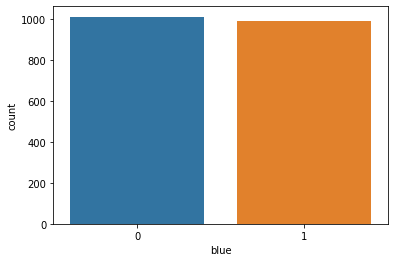

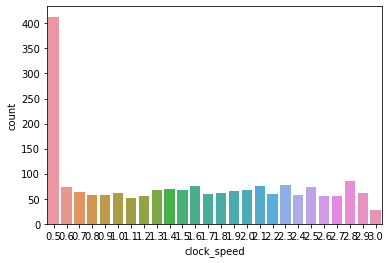

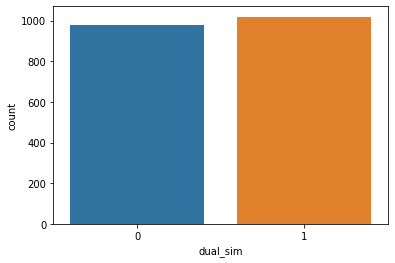

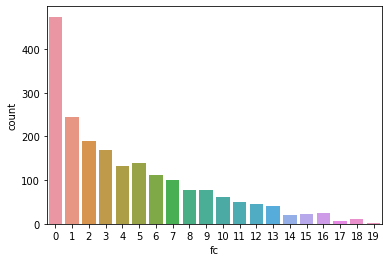

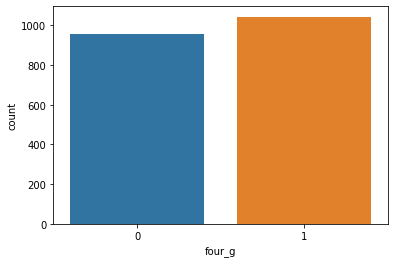

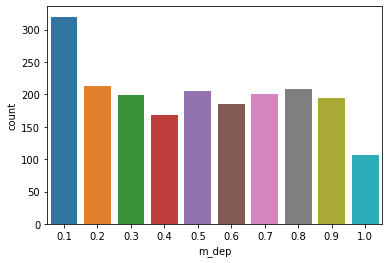

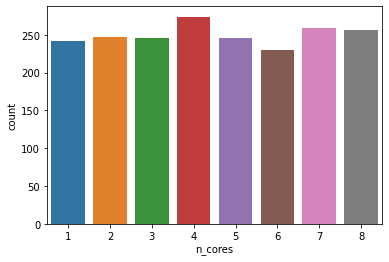

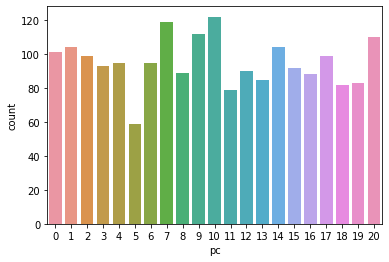

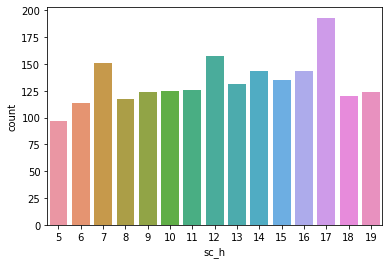

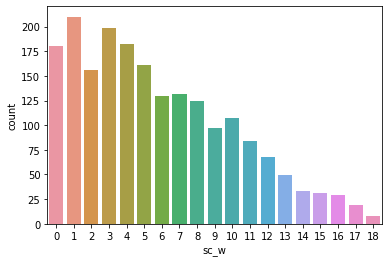

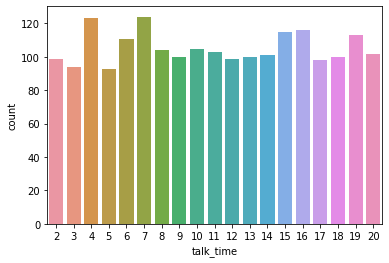

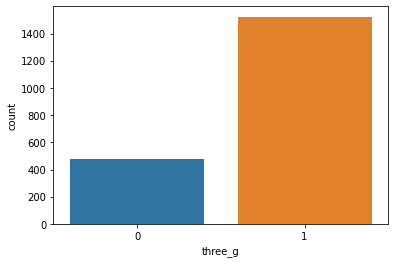

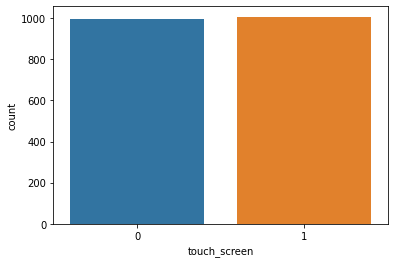

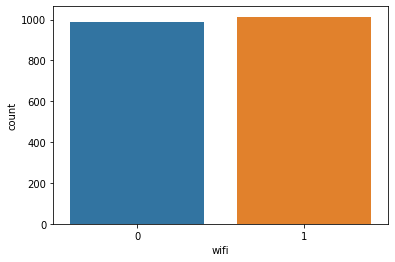

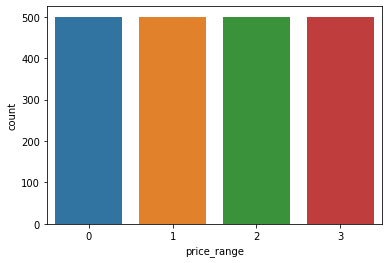

In [ ]:
for i in df:
    if(df[i].nunique()<30):
        sns.countplot(x=df[i])
        plt.show()

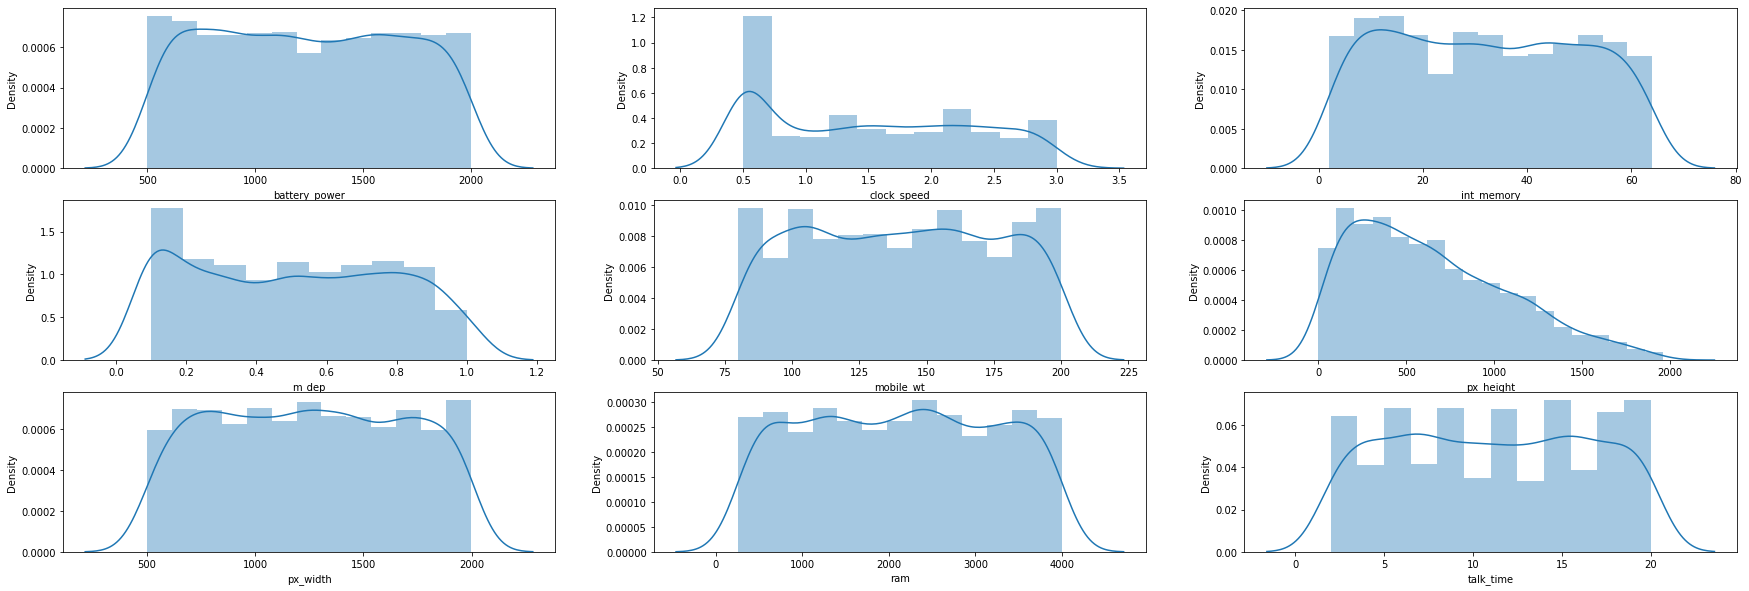

In [ ]:
#Distplot for various columns
plt.figure(figsize = (30,10))
plt.subplot(331)
sns.distplot(df['battery_power'])
plt.subplot(332)
sns.distplot(df['clock_speed'])
plt.subplot(333)
sns.distplot(df['int_memory'])
plt.subplot(334)
sns.distplot(df['m_dep'])
plt.subplot(335)
sns.distplot(df['mobile_wt'])
plt.subplot(336)
sns.distplot(df['px_height'])
plt.subplot(337)
sns.distplot(df['px_width'])
plt.subplot(338)
sns.distplot(df['ram'])
plt.subplot(339)
sns.distplot(df['talk_time'])
plt.show()

In [ ]:
#bluetooth devices
df["is_bluetooth"]=''
for i in range(len(df)):
    if df['blue'][i]==0:
        df['is_bluetooth'][i]='No'
    else:
        df['is_bluetooth'][i]='Yes'
px.pie(data_frame = df, names = 'is_bluetooth', title = 'Percentage of devices having bluetooth', hole= 0.2)

In [ ]:
#dual sim
df["is_DualSim"]=''
for i in range(len(df)):
    if df['dual_sim'][i]==0:
        df['is_DualSim'][i]='No'
    else:
        df['is_DualSim'][i]='Yes'
px.pie(data_frame = df, names = 'is_DualSim', title = 'Percentage of devices having dual sim', hole= 0.2)


In [ ]:
#4G
df["is_4G"]=''
for i in range(len(df)):
    if df['four_g'][i]==0:
        df['is_4G'][i]='No'
    else:
        df['is_4G'][i]='Yes'
px.pie(data_frame = df, names = 'is_4G', title = 'Percentage of devices having 4G connection', hole= 0.2)


In [ ]:
df["is_3G"]=''
for i in range(len(df)):
    if df['three_g'][i]==0:
        df['is_3G'][i]='No'
    else:
        df['is_3G'][i]='Yes'
px.pie(data_frame = df, names = 'is_3G', title = 'Percentage of devices having 3G connection', hole= 0.2)

In [ ]:
#Touch Screen
df["is_touchscreen"]=''
for i in range(len(df)):
    if df['touch_screen'][i]==0:
        df['is_touchscreen'][i]='No'
    else:
        df['is_touchscreen'][i]='Yes'
px.pie(data_frame = df, names = 'is_touchscreen', title = 'Percentage of devices having touch screen', hole= 0.2)


In [ ]:
#Wifi
df["is_wifi"]=''
for i in range(len(df)):
    if df['wifi'][i]==0:
        df['is_wifi'][i]='No'
    else:
        df['is_wifi'][i]='Yes'
px.pie(data_frame = df, names = 'is_wifi', title = 'Percentage of devices having Wifi', hole= 0.2)


In [ ]:
#Processors
df["cores"]=''
for i in range(len(df)):
    if df['n_cores'][i]==1:
        df['cores'][i]='single core'
    elif df['n_cores'][i]==2:
        df['cores'][i]='dual core'
    elif df['n_cores'][i]==3:
        df['cores'][i]='triple core'
    elif df['n_cores'][i]==4:
        df['cores'][i]='quad core'
    elif df['n_cores'][i]==5:
        df['cores'][i]='penta core'
    elif df['n_cores'][i]==6:
        df['cores'][i]='hexa core'
    elif df['n_cores'][i]==7:
        df['cores'][i]='hepta core'
    else:
        df['cores'][i]='octa core'
px.pie(data_frame = df, names = 'cores', title = 'Percentage of devices having different types of cores', hole= 0.2)


In [ ]:
#Training set
df1 = df.loc[:,['battery_power','blue','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','wifi','price_range']]
df1

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,wifi,price_range
0,842,0,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,1,1
1,1021,1,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,0,2
2,563,1,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,0,2
3,615,1,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,2
4,1821,1,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,0,0
1996,1965,1,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,2
1997,1911,0,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,0,3
1998,1512,0,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,0


In [ ]:
df2 = df.loc[:,['touch_screen','clock_speed']]
df2

,touch_screen,clock_speed
0,0,2.2
1,1,0.5
2,1,0.5
3,0,2.5
4,1,1.2
...,...,...
1995,1,0.5
1996,1,2.6
1997,1,0.9
1998,1,0.9


In [ ]:
df3 = pd.concat([df1, df2])
df3

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,px_width,ram,sc_h,sc_w,talk_time,three_g,wifi,price_range,touch_screen,clock_speed
0,842.0,0.0,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,...,756.0,2549.0,9.0,7.0,19.0,0.0,1.0,1.0,NaN,NaN
1,1021.0,1.0,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,...,1988.0,2631.0,17.0,3.0,7.0,1.0,0.0,2.0,NaN,NaN
2,563.0,1.0,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,...,1716.0,2603.0,11.0,2.0,9.0,1.0,0.0,2.0,NaN,NaN
3,615.0,1.0,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,...,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,2.0,NaN,NaN
4,1821.0,1.0,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,...,1212.0,1411.0,8.0,2.0,15.0,1.0,0.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.5
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.6
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.9
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.9


In [ ]:
#Test set
dataset = pd.read_csv(r"/content/MobileTest.csv")
dataset.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
data = dataset.rank(axis=1,ascending=True)
data

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,6.5,19.0,6.5,9.0,6.5,15.0,2.0,12.0,4.0,17.0,...,16.0,18.0,20.0,21.0,14.0,13.0,10.0,2.0,6.5,2.0
1,10.0,19.0,7.5,4.0,7.5,11.0,7.5,16.0,5.0,17.0,...,15.0,18.0,20.0,21.0,13.0,2.0,14.0,7.5,2.0,2.0
2,10.5,20.0,6.5,9.0,2.0,6.5,2.0,16.0,4.0,17.0,...,12.0,18.0,19.0,21.0,15.0,13.5,13.5,2.0,6.5,6.5
3,10.0,19.0,2.0,4.5,7.5,14.0,7.5,16.0,4.5,17.0,...,15.0,18.0,20.0,21.0,13.0,2.0,11.0,7.5,7.5,2.0
4,9.0,20.0,2.0,8.0,2.0,13.0,6.0,16.0,4.0,17.0,...,15.0,18.0,19.0,21.0,14.0,12.0,11.0,6.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,19.0,20.0,6.5,9.0,2.0,2.0,6.5,15.0,4.0,16.0,...,14.0,17.0,18.0,21.0,12.0,11.0,13.0,6.5,6.5,2.0
996,18.0,17.0,2.5,10.0,7.5,2.5,2.5,14.0,5.0,16.0,...,11.0,19.0,20.0,21.0,13.0,7.5,15.0,2.5,7.5,7.5
997,19.0,20.0,3.0,11.0,3.0,8.5,8.5,13.0,6.0,16.0,...,14.0,17.0,18.0,21.0,12.0,3.0,15.0,8.5,3.0,3.0
998,19.0,20.0,8.0,6.0,8.0,2.5,2.5,16.0,5.0,17.0,...,13.0,15.0,18.0,21.0,14.0,12.0,11.0,2.5,8.0,2.5


In [ ]:
data.sort_values(['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi'],ascending=True)
data

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,6.5,19.0,6.5,9.0,6.5,15.0,2.0,12.0,4.0,17.0,...,16.0,18.0,20.0,21.0,14.0,13.0,10.0,2.0,6.5,2.0
1,10.0,19.0,7.5,4.0,7.5,11.0,7.5,16.0,5.0,17.0,...,15.0,18.0,20.0,21.0,13.0,2.0,14.0,7.5,2.0,2.0
2,10.5,20.0,6.5,9.0,2.0,6.5,2.0,16.0,4.0,17.0,...,12.0,18.0,19.0,21.0,15.0,13.5,13.5,2.0,6.5,6.5
3,10.0,19.0,2.0,4.5,7.5,14.0,7.5,16.0,4.5,17.0,...,15.0,18.0,20.0,21.0,13.0,2.0,11.0,7.5,7.5,2.0
4,9.0,20.0,2.0,8.0,2.0,13.0,6.0,16.0,4.0,17.0,...,15.0,18.0,19.0,21.0,14.0,12.0,11.0,6.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,19.0,20.0,6.5,9.0,2.0,2.0,6.5,15.0,4.0,16.0,...,14.0,17.0,18.0,21.0,12.0,11.0,13.0,6.5,6.5,2.0
996,18.0,17.0,2.5,10.0,7.5,2.5,2.5,14.0,5.0,16.0,...,11.0,19.0,20.0,21.0,13.0,7.5,15.0,2.5,7.5,7.5
997,19.0,20.0,3.0,11.0,3.0,8.5,8.5,13.0,6.0,16.0,...,14.0,17.0,18.0,21.0,12.0,3.0,15.0,8.5,3.0,3.0
998,19.0,20.0,8.0,6.0,8.0,2.5,2.5,16.0,5.0,17.0,...,13.0,15.0,18.0,21.0,14.0,12.0,11.0,2.5,8.0,2.5


In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=0)

In [ ]:
#logistic Regression
log=LogisticRegression()
log.fit(x_train,y_train)
print("Training score of LogisticRegression is: {}".format(log.score(x_train,y_train)*100))
y_predlog=log.predict(x_test)
print(y_predlog)
acrr=accuracy_score(y_test,y_predlog)*100
print("Accuracy of Logistic Regression Classifier is: {}%".format(acrr))
print("Confusion matrix Logistic Regression Classifier is: \n{}".format(confusion_matrix(y_test,y_predlog)))
print("{}".format(classification_report(y_test,y_predlog)))

Training score of LogisticRegression is: 56.00000000000001
[1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0
 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0
 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1
 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1]
Accuracy of Logistic Regression Classifier is: 50.8%
Confusion matrix Logistic Regression Classifier is: 
[[58 61]
 [62 69]]
              precision    recall  f1-score   support

           0       0.48      0.49      0.49       119
           1       0.53      0.53      0.53       131

    accuracy                           0.51       250
   macro avg       0.51      0.51      0.51       250
weighted avg       0.51      0.51   

In [ ]:
#Gussain NB
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
print("Training score of GaussianNB is {}".format(nb.score(x_train,y_train)*100))
y_pred=nb.predict(x_test)
ac_nb=accuracy_score(y_test,y_pred)*100
print("Accuracy of Naive Bayes Classifier is: {}".format(ac_nb))
print("Confusion matrix of Naive Bayes Classifier is:{}".format(confusion_matrix(y_test,y_pred)))
print("{}".format(classification_report(y_test,y_pred)))

Training score of GaussianNB is 56.93333333333334
Accuracy of Naive Bayes Classifier is: 53.2
Confusion matrix of Naive Bayes Classifier is:[[61 58]
 [59 72]]
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       119
           1       0.55      0.55      0.55       131

    accuracy                           0.53       250
   macro avg       0.53      0.53      0.53       250
weighted avg       0.53      0.53      0.53       250



In [ ]:
#SVM
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)
print("Training score of SVM is: {}".format(svm.score(x_train,y_train)*100))
y_pred_svm=svm.predict(x_test)
ac_svm=accuracy_score(y_test,y_pred_svm)*100
print("Accuracy of SVM is: {}".format(ac_svm))
print("Confusion matrix of SVM is: {}".format(confusion_matrix(y_test,y_pred_svm)))
print("{}".format(classification_report(y_test,y_pred_svm)))

Training score of SVM is: 81.46666666666667
Accuracy of SVM is: 46.0
Confusion matrix of SVM is: [[58 61]
 [74 57]]
              precision    recall  f1-score   support

           0       0.44      0.49      0.46       119
           1       0.48      0.44      0.46       131

    accuracy                           0.46       250
   macro avg       0.46      0.46      0.46       250
weighted avg       0.46      0.46      0.46       250



In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion = "entropy")
DT.fit(x_train,y_train)
print("Training score of DecisionTreeClassifier is: {}".format(DT.score(x_train,y_train)*100))
y_pred_DT=DT.predict(x_test)
ac_DT=accuracy_score(y_test,y_pred_DT)*100
print("Accuracy of Decision Tree Classifier is: {}".format(ac_DT))
print("Confusion matrix of Decision Tree Classifier is: {}".format(confusion_matrix(y_test,y_pred_DT)))
print("{}".format(classification_report(y_test,y_pred_DT)))

Training score of DecisionTreeClassifier is: 100.0
Accuracy of Decision Tree Classifier is: 48.4
Confusion matrix of Decision Tree Classifier is: [[55 64]
 [65 66]]
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       119
           1       0.51      0.50      0.51       131

    accuracy                           0.48       250
   macro avg       0.48      0.48      0.48       250
weighted avg       0.48      0.48      0.48       250



In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=300)
RF.fit(x_train,y_train)
print("Training score of Random Forest Classifier is: {}".format(RF.score(x_train,y_train)*100))
y_pred_RF=RF.predict(x_test)
ac_RF=accuracy_score(y_test,y_pred_RF)*100
print("Accuracy of Random Forest Classifier is: {}".format(ac_RF))
print("Confusion matrix of Random Forest Classifier is: {}".format(confusion_matrix(y_test,y_pred_RF)))
print("{}".format(classification_report(y_test,y_pred_RF)))

Training score of Random Forest Classifier is: 100.0
Accuracy of Random Forest Classifier is: 47.199999999999996
Confusion matrix of Random Forest Classifier is: [[54 65]
 [67 64]]
              precision    recall  f1-score   support

           0       0.45      0.45      0.45       119
           1       0.50      0.49      0.49       131

    accuracy                           0.47       250
   macro avg       0.47      0.47      0.47       250
weighted avg       0.47      0.47      0.47       250



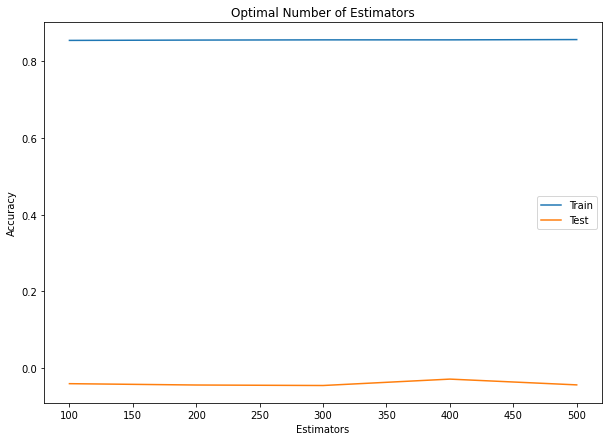

   n_neighbors  train_accuracy  test_accuracy
0          100        0.854604      -0.040537
1          200        0.855459      -0.044018
2          300        0.856001      -0.045305
3          400        0.856020      -0.028640
4          500        0.856759      -0.043687


In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
train_accuracy=[]
test_accuracy=[]
for i in range(100,600,100):
    c=RandomForestRegressor(n_estimators=i)
    c.fit(x_train,y_train)
    train_accuracy.append(c.score(x_train,y_train))
    test_accuracy.append(c.score(x_test,y_test))
frame=pd.DataFrame({"n_neighbors":range(100,600,100),"train_accuracy":train_accuracy,"test_accuracy":test_accuracy})
frame
plt.figure(figsize=(10,7))
plt.plot(range(100,600,100),frame["train_accuracy"],label="Train")
plt.plot(range(100,600,100),frame["test_accuracy"],label="Test")
plt.title("Optimal Number of Estimators")
plt.xlabel("Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print(frame)

In [ ]:
#Classifiers
classifiers=["LogisticRegression","GaussianNB","SVM","DecisionTreeClassifier","RandomForestClassifier"]
accuracy_=[acrr,ac_nb,ac_svm,ac_DT,ac_RF]
df_ac=pd.DataFrame({'model':classifiers,"accuracy":accuracy_})
px.histogram(data_frame=df_ac,x="model",y="accuracy")

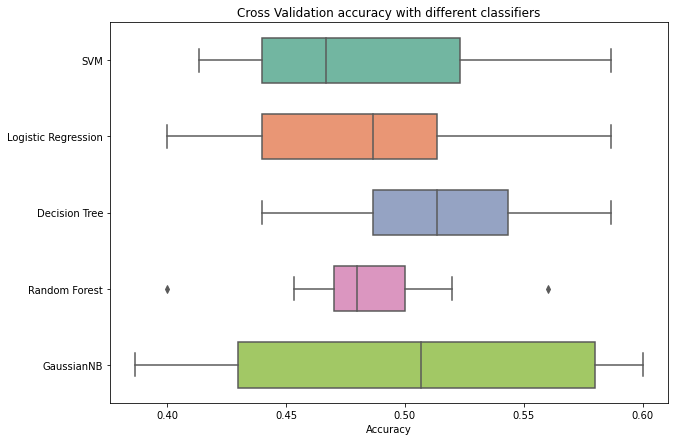

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 10)
xyz = []
accuracy = []

classifiers=["SVM","Logistic Regression","Decision Tree","Random Forest","GaussianNB"]
models=[SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=300,random_state=0),GaussianNB()]

for i in models:
    model = i
    cv_result=cross_val_score(model,x_train,y_train,cv=kfold,scoring="accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)
    
cv_models_datafeame= pd.DataFrame(xyz, index = classifiers)
cv_models_datafeame.columns = ['CV Mean']
cv_models_datafeame
cv_models_datafeame.sort_values(['CV Mean'], ascending =[0])

box = pd.DataFrame(accuracy, index = [classifiers])
boxT = box.T
plt.figure(figsize = (10,7))
ax = sns.boxplot(data = boxT, orient = "h", palette = "Set2", width = 0.6)
ax.set_yticklabels(classifiers)
ax.set_title('Cross Validation accuracy with different classifiers')
ax.set_xlabel('Accuracy')

plt.show()


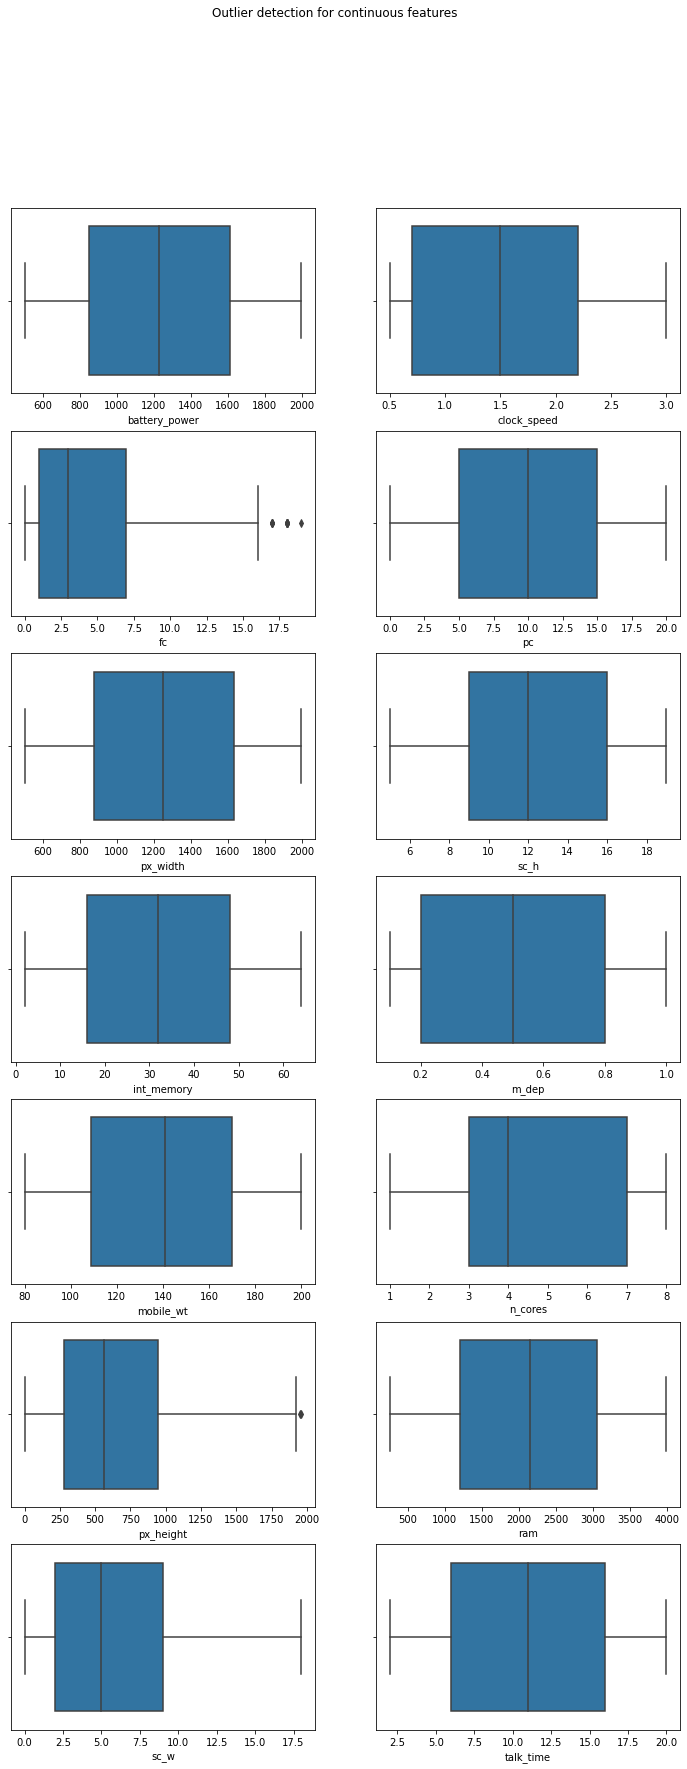

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(12,28))
fig .suptitle("Outlier detection for continuous features")
sns.boxplot(x=df['battery_power'],ax=ax[0,0])
sns.boxplot(x=df['clock_speed'],ax=ax[0,1])
sns.boxplot(x=df['fc'],ax=ax[1,0])
sns.boxplot(x=df['pc'],ax=ax[1,1])
sns.boxplot(x=df['px_width'],ax=ax[2,0])
sns.boxplot(x=df['sc_h'],ax=ax[2,1])
sns.boxplot(x=df['int_memory'],ax=ax[3,0])
sns.boxplot(x=df['m_dep'],ax=ax[3,1])
sns.boxplot(x=df['mobile_wt'],ax=ax[4,0])
sns.boxplot(x=df['n_cores'],ax=ax[4,1])
sns.boxplot(x=df['px_height'],ax=ax[5,0])
sns.boxplot(x=df['ram'],ax=ax[5,1])
sns.boxplot(x=df['sc_w'],ax=ax[6,0])
sns.boxplot(x=df['talk_time'],ax=ax[6,1])
plt.show()

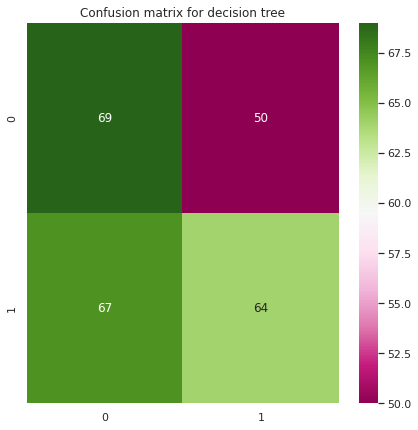

              precision    recall  f1-score   support

           0       0.51      0.58      0.54       119
           1       0.56      0.49      0.52       131

    accuracy                           0.53       250
   macro avg       0.53      0.53      0.53       250
weighted avg       0.54      0.53      0.53       250



(-1.012579431772709, 0.36743265381259077)

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=0,max_depth = 10)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
y_pred = dt.predict(x_test)
dtc = confusion_matrix(y_test, y_pred)
dtc
sns.set(rc = {'figure.figsize':(7,7)})
sns.heatmap(dtc, annot=True,cmap="PiYG")
plt.title("Confusion matrix for decision tree")
plt.show()
resultdt = classification_report(y_test,y_pred)

# print the result
print(resultdt)
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)
from sklearn.model_selection import cross_validate
#model = VotingRegressor
crossval = cross_validate(dt, x, y, cv=10, scoring = "r2" , return_train_score=True)
crossval['test_score'].mean(), crossval['train_score'].mean()


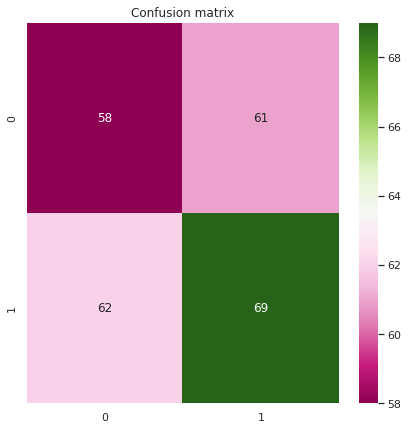

              precision    recall  f1-score   support

           0       0.48      0.49      0.49       119
           1       0.53      0.53      0.53       131

    accuracy                           0.51       250
   macro avg       0.51      0.51      0.51       250
weighted avg       0.51      0.51      0.51       250



(-0.9485506202480991, -0.7150046617886983)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=2)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
y_pred = lr.predict(x_test)
lrc = confusion_matrix(y_test, y_pred)
lrc
sns.set(rc = {'figure.figsize':(7,7)})
sns.heatmap(lrc, annot=True,cmap="PiYG")
plt.title("Confusion matrix")
plt.show()
resultlr = classification_report(y_test,y_pred)

# print the result
print(resultlr)
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)
from sklearn.model_selection import cross_validate
#model = VotingRegressor
crossval = cross_validate(lr, x, y, cv=10, scoring = "r2" , return_train_score=True)
crossval['test_score'].mean(), crossval['train_score'].mean()

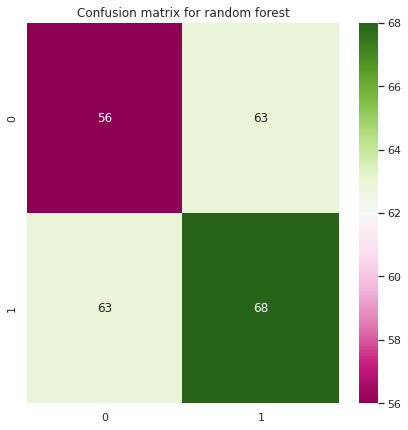

              precision    recall  f1-score   support

           0       0.47      0.47      0.47       119
           1       0.52      0.52      0.52       131

    accuracy                           0.50       250
   macro avg       0.49      0.49      0.49       250
weighted avg       0.50      0.50      0.50       250



(-1.0685906362545017, 0.9973328020865321)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(max_depth=10, random_state=0)
random.fit(x_train, y_train)
random.score(x_train, y_train)
y_pred = random.predict(x_test)
rfc = confusion_matrix(y_test, y_pred)
rfc
sns.set(rc = {'figure.figsize':(7,7)})
sns.heatmap(rfc, annot=True,cmap="PiYG")

plt.title("Confusion matrix for random forest")
plt.show()
resultrandom = classification_report(y_test,y_pred)
print(resultrandom)
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)
from sklearn.model_selection import cross_validate
#model = VotingRegressor
crossval = cross_validate(random, x, y, cv=10, scoring = "r2" , return_train_score=True)
crossval['test_score'].mean(), crossval['train_score'].mean()

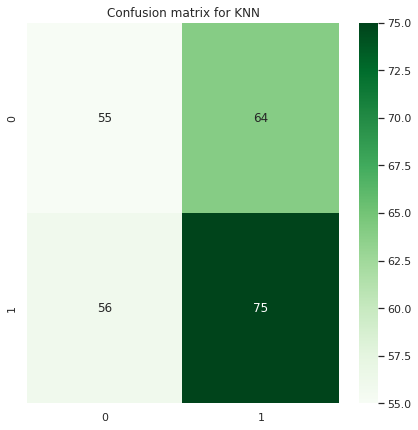

              precision    recall  f1-score   support

           0       0.50      0.46      0.48       119
           1       0.54      0.57      0.56       131

    accuracy                           0.52       250
   macro avg       0.52      0.52      0.52       250
weighted avg       0.52      0.52      0.52       250



(-1.1606130452180872, -0.653659537942177)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
knn.score(x_test,y_test)
y_pred = knn.predict(x_test)
knnc = confusion_matrix(y_test, y_pred)
knnc
sns.set(rc = {'figure.figsize':(7,7)})
sns.heatmap(knnc, annot=True,cmap = 'Greens')
plt.title("Confusion matrix for KNN")
plt.show()
resultknn = classification_report(y_test,y_pred)
print(resultknn)
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)
from sklearn.model_selection import cross_validate

crossval = cross_validate(knn, x, y, cv=10, scoring = "r2" , return_train_score=True)
crossval['test_score'].mean(), crossval['train_score'].mean()

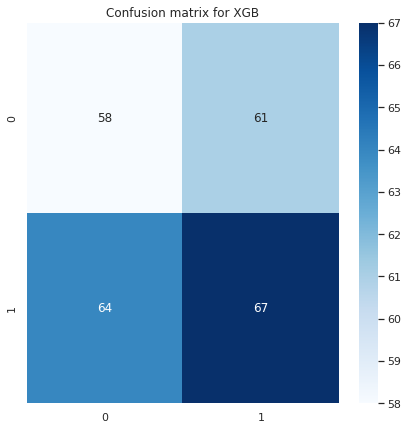

              precision    recall  f1-score   support

           0       0.48      0.49      0.48       119
           1       0.52      0.51      0.52       131

    accuracy                           0.50       250
   macro avg       0.50      0.50      0.50       250
weighted avg       0.50      0.50      0.50       250



In [ ]:
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)
from sklearn.model_selection import cross_validate
#model = VotingRegressor
crossval = cross_validate(knn,x, y, cv=10, scoring = "r2" , return_train_score=True)
crossval['test_score'].mean(), crossval['train_score'].mean()
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
y_pred = xgb.predict(x_test)
xgbc = confusion_matrix(y_test, y_pred)
xgbc
sns.set(rc = {'figure.figsize':(7,7)})
sns.heatmap(xgbc, annot=True,cmap ="Blues")
plt.title("Confusion matrix for XGB")
plt.show()
resultxgb = classification_report(y_test,y_pred)

# print the result
print(resultxgb)


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cvalidation = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cvalidation, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.488444 using {'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'uniform'}
0.463556 (0.049012) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.463556 (0.049012) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.480000 (0.067198) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.480000 (0.067198) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.471556 (0.061148) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.471556 (0.061148) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.481333 (0.064438) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.481333 (0.064438) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.469333 (0.065988) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.469333 (0.065988) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.457333 

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.509333 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.498667 (0.055682) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.498667 (0.055682) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.498667 (0.055682) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.498222 (0.054811) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.498222 (0.054811) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.498222 (0.054811) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.498667 (0.056106) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.498667 (0.056106) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.498667 (0.056106) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.499111 (0.055263) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.498667 (0.055468) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.499111 (0.054507) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.507556 (0.058922) wi

In [ ]:
df["rank_by_price"] = df["price_range"].rank()
dt1 = df
dt1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,wifi,price_range,is_bluetooth,is_DualSim,is_4G,is_3G,is_touchscreen,is_wifi,cores,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1,1,No,No,No,No,No,Yes,dual core,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,0,2,Yes,Yes,Yes,Yes,Yes,No,triple core,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,0,2,Yes,Yes,Yes,Yes,Yes,No,penta core,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,0,2,Yes,No,No,Yes,No,No,hexa core,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,0,1,Yes,No,Yes,Yes,Yes,No,dual core,750.5


In [ ]:
dt1["rank_by_price"] = dt1["rank_by_price"].sort_values()
dt1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,wifi,price_range,is_bluetooth,is_DualSim,is_4G,is_3G,is_touchscreen,is_wifi,cores,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1,1,No,No,No,No,No,Yes,dual core,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,0,2,Yes,Yes,Yes,Yes,Yes,No,triple core,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,0,2,Yes,Yes,Yes,Yes,Yes,No,penta core,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,0,2,Yes,No,No,Yes,No,No,hexa core,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,0,1,Yes,No,Yes,Yes,Yes,No,dual core,750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,0,0,Yes,Yes,Yes,Yes,Yes,No,hexa core,250.5
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1,2,Yes,Yes,No,Yes,Yes,Yes,quad core,1250.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,0,3,No,Yes,Yes,Yes,Yes,No,octa core,1750.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,1,0,No,No,Yes,Yes,Yes,Yes,penta core,250.5


In [ ]:
dt1.sort_values(by=["rank_by_price"])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,wifi,price_range,is_bluetooth,is_DualSim,is_4G,is_3G,is_touchscreen,is_wifi,cores,rank_by_price
1838,720,1,0.9,1,12,1,14,0.8,165,4,...,0,0,Yes,Yes,Yes,Yes,Yes,No,quad core,250.5
1762,808,1,0.5,1,3,0,46,0.5,105,8,...,1,0,Yes,Yes,No,Yes,No,Yes,octa core,250.5
419,914,1,0.9,0,2,0,4,0.8,100,2,...,0,0,Yes,No,No,Yes,Yes,No,dual core,250.5
846,1489,0,2.4,1,8,0,32,0.6,200,1,...,0,0,No,Yes,No,No,No,No,single core,250.5
845,1907,0,2.0,0,13,0,55,0.9,105,7,...,1,0,No,No,No,Yes,No,Yes,hepta core,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1046,1,2.8,1,0,1,58,0.2,100,8,...,1,3,Yes,Yes,Yes,Yes,Yes,Yes,octa core,1750.5
982,1035,0,0.6,1,2,1,44,0.5,99,3,...,0,3,No,Yes,Yes,Yes,Yes,No,triple core,1750.5
987,1688,0,2.5,0,0,1,21,0.2,170,7,...,1,3,No,No,Yes,Yes,Yes,Yes,hepta core,1750.5
956,862,0,2.3,0,9,1,6,0.1,107,8,...,1,3,No,No,Yes,Yes,Yes,Yes,octa core,1750.5


In [ ]:
dt1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,wifi,price_range,is_bluetooth,is_DualSim,is_4G,is_3G,is_touchscreen,is_wifi,cores,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1,1,No,No,No,No,No,Yes,dual core,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,0,2,Yes,Yes,Yes,Yes,Yes,No,triple core,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,0,2,Yes,Yes,Yes,Yes,Yes,No,penta core,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,0,2,Yes,No,No,Yes,No,No,hexa core,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,0,1,Yes,No,Yes,Yes,Yes,No,dual core,750.5


In [ ]:
dt2 = pd.read_csv(r"MobileTrain.csv")
RankedDataset1 = dt2.rank()
RankedDataset1.sort_values(by="price_range")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1838,320.5,1505.5,638.5,1491.0,1853.0,1479.0,432.0,1595.5,1414.5,872.5,...,657.5,978.0,445.5,1214.0,1284.5,146.5,1239.0,1497.5,493.5,250.5
1762,435.5,1505.5,207.0,1491.0,993.5,479.0,1451.5,1003.0,436.0,1872.5,...,189.0,45.0,442.0,1353.0,1008.0,901.0,1239.0,497.5,1493.5,250.5
419,589.0,1505.5,638.5,491.0,814.0,479.0,77.5,1595.5,325.5,366.0,...,329.5,1341.0,306.0,791.5,1284.5,363.0,1239.0,1497.5,493.5,250.5
846,1323.5,505.5,1612.5,1491.0,1601.0,479.0,1011.0,1198.5,1991.0,121.5,...,288.0,408.0,292.0,287.0,1153.5,696.5,239.0,497.5,493.5,250.5
845,1875.0,505.5,1337.0,491.0,1895.5,479.0,1727.0,1797.0,436.0,1615.0,...,1231.5,1363.0,16.0,1214.0,836.5,1636.5,1239.0,497.5,1493.5,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,753.0,1505.5,1868.0,1491.0,237.5,1479.0,1828.5,427.0,325.5,1872.5,...,455.0,728.0,1919.0,1660.0,1797.5,798.5,1239.0,1497.5,1493.5,1750.5
982,737.5,505.5,450.5,1491.0,814.0,1479.0,1382.0,1003.0,309.0,612.5,...,419.5,1937.0,1732.0,1214.0,1008.0,1106.0,1239.0,1497.5,493.5,1750.5
987,1583.0,505.5,1678.5,491.0,237.5,1479.0,669.5,427.0,1496.0,1615.0,...,1134.0,481.5,1994.0,1660.0,1897.0,696.5,1239.0,1497.5,1493.5,1750.5
956,515.5,505.5,1544.5,491.0,1678.5,1479.0,142.0,160.5,472.5,1872.5,...,1371.0,1966.0,1703.5,541.5,836.5,798.5,1239.0,1497.5,1493.5,1750.5


In [ ]:
b = dt2
b["rank_by_price"] = b["price_range"].rank()
b["rank_by_battery"] = b["battery_power"].rank(ascending=False)
b["rank_by_blueooth"] = b["blue"].rank(ascending=False)
b["rank_by_clockspeed"] = b["clock_speed"].rank(ascending=False)
b["rank_by_DualSIM"] = b["dual_sim"].rank(ascending=False)
b["rank_by_fc"] = b["fc"].rank(ascending=False)
b["rank_by_4G"] = b["four_g"].rank(ascending=False)
b["rank_by_InternalMemory"] = b["int_memory"].rank(ascending=False)
b["rank_by_mdep"] = b["m_dep"].rank(ascending=False)
b["rank_by_weight"] = b["mobile_wt"].rank(ascending=True)
b["rank_by_ncores"] = b["n_cores"].rank(ascending=False)
b["rank_by_pc"] = b["pc"].rank(ascending=False)
b["rank_by_height"] = b["px_height"].rank(ascending=False)
b["rank_by_width"] = b["px_width"].rank(ascending=False)
b["rank_by_ram"] = b["ram"].rank(ascending=False)
b["rank_by_sch"] = b["sc_h"].rank(ascending=False)
b["rank_by_scw"] = b["sc_w"].rank(ascending=False)
b["rank_by_talktime"] = b["talk_time"].rank(ascending=False)
b["rank_by_3G"] = b["three_g"].rank(ascending=False)
b["rank_by_touchscreen"] = b["touch_screen"].rank(ascending=False)
b["rank_by_wifi"] = b["wifi"].rank(ascending=False)
b.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5


In [ ]:
RankedDataset2 = b.iloc[:,21:]
RankedDataset2

,rank_by_price,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,750.5,1512.5,1495.5,525.0,1510.0,1404.0,1522.0,1820.5,802.5,1783.5,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1250.5,1278.5,495.5,1794.0,510.0,1763.5,522.0,334.5,609.5,932.5,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,1250.5,1909.5,495.5,1794.0,510.0,1187.0,522.0,720.0,204.0,1069.0,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,1250.5,1830.0,495.5,322.5,1510.0,1763.5,1522.0,1710.5,405.5,846.0,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,750.5,242.0,495.5,1193.5,1510.0,105.5,522.0,619.0,802.5,1006.0,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,250.5,1587.5,495.5,1794.0,510.0,1763.5,522.0,1979.5,405.5,456.0,...,606.5,244.5,163.0,1767.0,924.0,1164.5,159.0,762.0,503.5,1507.5
1996,1250.5,58.0,495.5,258.0,510.0,1763.5,1522.0,784.5,1574.0,1766.5,...,1650.0,536.0,54.5,1062.0,1209.5,375.0,471.5,762.0,503.5,507.5
1997,1750.5,121.5,1495.5,1362.5,510.0,1404.0,522.0,860.0,609.5,486.5,...,1650.0,583.5,502.0,504.0,1459.5,1715.5,1638.0,762.0,503.5,1507.5
1998,250.5,648.0,1495.5,1362.5,1510.0,856.0,522.0,549.5,1840.5,1069.0,...,1479.0,1395.5,1792.5,1664.5,184.5,375.0,159.0,762.0,503.5,507.5
